1️⃣ Generating Synthetic Data

In [2]:
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Features: 100 samples, 3 features
X = np.random.rand(100, 3)

# True coefficients
true_w = np.array([3, 5, -2])

# Target with noise
y = X @ true_w + np.random.randn(100) * 0.5

print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Feature matrix X shape: (100, 3)
Target vector y shape: (100,)


2️⃣ Feature Scaling & Normalization

In [3]:
# Min-Max Scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

# Standardization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

print("First 5 samples after standardization:\n", X_standardized[:5])

First 5 samples after standardization:
 [[-0.35958026  1.4198383   0.82216804]
 [ 0.42811633 -1.15479213 -1.18711031]
 [-1.47181267  1.14595419  0.36561862]
 [ 0.81266807 -1.59356748  1.65209819]
 [ 1.24978474 -0.97232681 -1.09700508]]


3️⃣ Train/Test Split

In [4]:
# Shuffle indices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Split 80% train / 20% test
train_size = int(0.8 * X.shape[0])
train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (80, 3) (80,)
Test shape: (20, 3) (20,)


4️⃣ Linear Regression

In [5]:
# Closed-form solution (Normal Equation)
w_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Predictions
y_pred = X_test @ w_hat

# Mean Squared Error
mse = np.mean((y_test - y_pred)**2)
print("Learned coefficients:", w_hat)
print("Test MSE:", mse)

Learned coefficients: [ 3.10335623  4.88877018 -1.86726428]
Test MSE: 0.27073697380442907


5️⃣ Vectorized Operations & Efficiency

In [6]:
# Example: compute Euclidean distance between all points
dists = np.sqrt(np.sum((X_train[:, np.newaxis, :] - X_train[np.newaxis, :, :])**2, axis=2))
print("Distance matrix shape:", dists.shape)

Distance matrix shape: (80, 80)


7️⃣ Mini k-NN Implementation

In [7]:
import numpy as np

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))

# k-NN classifier
def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for x in X_test:
        distances = euclidean_distance(X_train, x)
        nearest_idx = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_idx]
        # Majority vote
        counts = np.bincount(nearest_labels.astype(int))
        y_pred.append(np.argmax(counts))
    return np.array(y_pred)

# For demonstration, create simple labels (0 or 1)
y_train_labels = (y_train > y_train.mean()).astype(int)
y_test_labels = (y_test > y_train.mean()).astype(int)

# Predict
y_test_pred = knn_predict(X_train, y_train_labels, X_test, k=5)

# Accuracy
accuracy = np.mean(y_test_pred == y_test_labels)
print("k-NN Test Accuracy:", accuracy)


k-NN Test Accuracy: 0.95


8️⃣ Add Visualizations

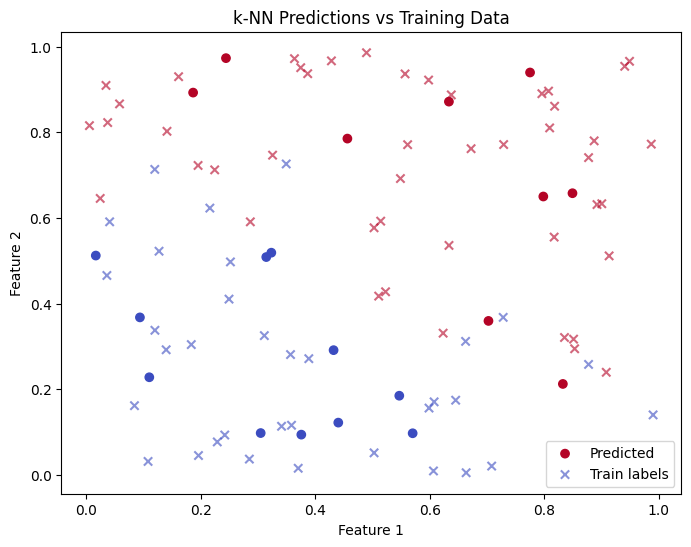

In [8]:
import matplotlib.pyplot as plt

# Visualize the first two features
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred, cmap='coolwarm', label='Predicted')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_labels, cmap='coolwarm', marker='x', alpha=0.6, label='Train labels')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-NN Predictions vs Training Data")
plt.legend()
plt.show()


## ✅ Summary

In this notebook, we learned:

How to generate synthetic ML datasets

Feature scaling & normalization

Train/test splitting without libraries

Implementing linear regression from scratch

Vectorized operations for efficiency

A mini k-NN classifier implemented with NumPy

Visualizing ML data and predictions using Matplotlib